In [1]:
import numpy as np
import pandas as pd

In [40]:
from IPython.display import display, HTML
# Any results you write to the current directory are saved as output.

#For plotting
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 18))

<Figure size 864x1296 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
holiday = pd.read_csv('Holiday_calendar.csv')

In [6]:
train.isnull().sum()

application_date    0
segment             0
branch_id           0
state               0
zone                0
case_count          0
dtype: int64

In [4]:
# print(train.state.unique())
# branch = train.state.unique()
# for each in branch:
#     print('for Branch: {} state is: {}'.format(each, train[train['state']==each].branch_id.unique()))

# ======================================================================
for i in range(len(train)):
    state = train['state'][i]
    if state == 'WEST BENGAL':
        train['branch_id'][i] = 8.0

    if state == 'KARNATAKA':
        train['branch_id'][i] = 13.0
    
    if state == 'TAMIL NADU':
        train['branch_id'][i] = 64.0
    
    if state == 'UTTAR PRADESH':
        train['branch_id'][i] = 14.0
    
    if state == 'PUNJAB':
        train['branch_id'][i] = 62.0
    
    if state == 'MAHARASHTRA':
        train['branch_id'][i] = 19.0
    
    if state == 'ORISSA':
        train['branch_id'][i] = 48.0
    
    if state == 'GUJARAT':
        train['branch_id'][i] = 61.0
    
    if state == 'ASSAM':
        train['branch_id'][i] = 65.0
        
    if state == 'JHARKHAND':
        train['branch_id'][i] = 104.0
    
    if state == 'KERALA':
        train['branch_id'][i] = 82.0
    
    if state == 'CHHATTISGARH':
        train['branch_id'][i] = 84.0
    
    if state == 'BIHAR':
        train['branch_id'][i] = 159.0
    
    if state == 'TRIPURA':
        train['branch_id'][i] = 251.0
    
    if state == 'MADHYA PRADESH':
        train['branch_id'][i] = 147.0
    
    if state == 'HARYANA':
        train['branch_id'][i] = 271.0

# ===============================================================
# zone = train.zone.unique()
# for each in zone:
#     print('for each zone: {} state is: {}'.format(each, train[train['zone']==each].state.unique()))

#     ==============================================================

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

In [5]:
east = ['WEST BENGAL', 'UTTAR PRADESH', 'ASSAM', 'UTTARAKHAND', 'BIHAR','TRIPURA','ORISSA']
north = ['DELHI', 'PUNJAB', 'HARYANA']
south = ['KARNATAKA', 'TAMIL NADU', 'TELANGANA', 'ANDHRA PRADESH', 'ORISSA', 'JHARKHAND', 'KERALA']
west = ['MAHARASHTRA', 'GUJARAT']
central = ['CHHATTISGARH', 'MADHYA PRADESH']
for i in range(len(train)):
    state = train['state'][i]
    if state in east:
        train['zone'][i] = 'EAST'
    
    if state in north:
        train['zone'][i] = 'NORTH'
    
    if state in south:
        train['zone'][i] = 'SOUTH'
    
    if state in west:
        train['zone'][i] = 'WEST'
    
    if state in central:
        train['zone'][i] = 'CENTRAL'

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [7]:
train['year'] = 1
train['month'] = 1
train['day'] = 1
train['week'] = 1
train['weekend'] = 1
train['holiday'] = 0
import datetime
# Some data engineering on datetime
for i in range(len(train)):
    o_date  = train['application_date'][i]
    date = datetime.datetime.strptime(o_date, '%Y-%m-%d')
    dt = date.isocalendar()
    train['year'][i] = dt[0]
    train['month'][i] = date.month
    train['day'][i] = date.day
    train['week'][i] = dt[1]
    if dt[2] == 5 or dt[2] == 6:
        train['weekend'][i] = 1
    else:
        train['weekend'][i] = 0
    for j in range(len(holiday)):
        holi_date = holiday['Date'][j]
        if(o_date == holi_date):
            train['holiday'][i]=1

c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\navneet.a.arya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [8]:
train.head()

,application_date,segment,branch_id,state,zone,case_count,year,month,day,week,weekend,holiday
0,2017-04-01,1,8.0,WEST BENGAL,EAST,40.0,2017,4,1,13,1,0
1,2017-04-03,1,8.0,WEST BENGAL,EAST,5.0,2017,4,3,14,0,0
2,2017-04-04,1,8.0,WEST BENGAL,EAST,4.0,2017,4,4,14,0,0
3,2017-04-05,1,8.0,WEST BENGAL,EAST,113.0,2017,4,5,14,0,1
4,2017-04-07,1,8.0,WEST BENGAL,EAST,76.0,2017,4,7,14,1,0


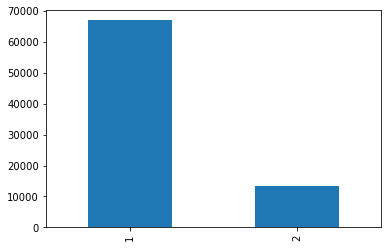

In [30]:
train['segment'].value_counts().plot.bar()

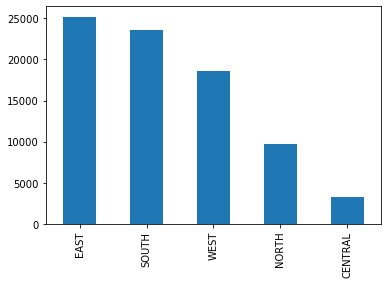

In [34]:
train['zone'].value_counts().plot.bar()

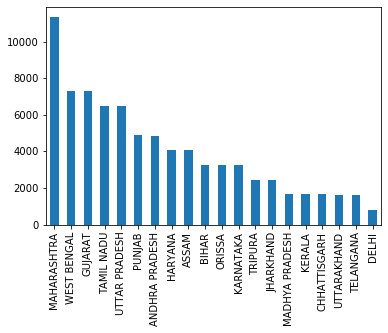

In [35]:
train['state'].value_counts().plot.bar()

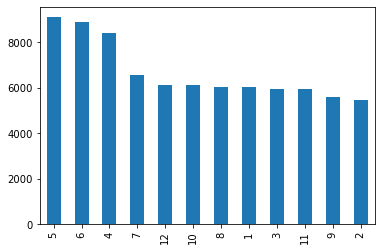

In [36]:
train['month'].value_counts().plot.bar()

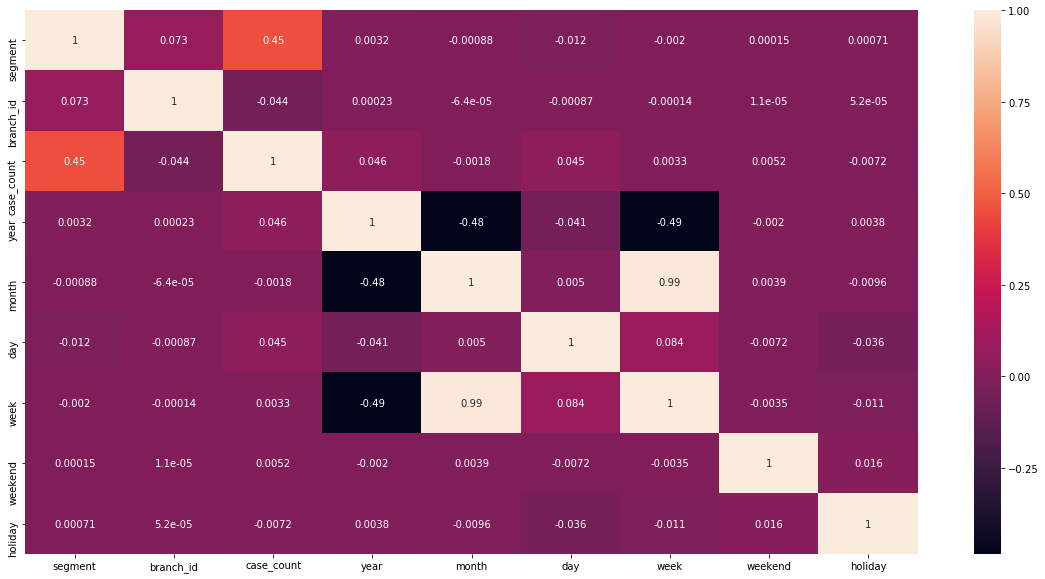

In [43]:
plt.figure(figsize=(20, 10))

train_corr = train.corr()
sns.heatmap(train_corr, 
            xticklabels = train_corr.columns.values,
            yticklabels = train_corr.columns.values,
            annot = True);

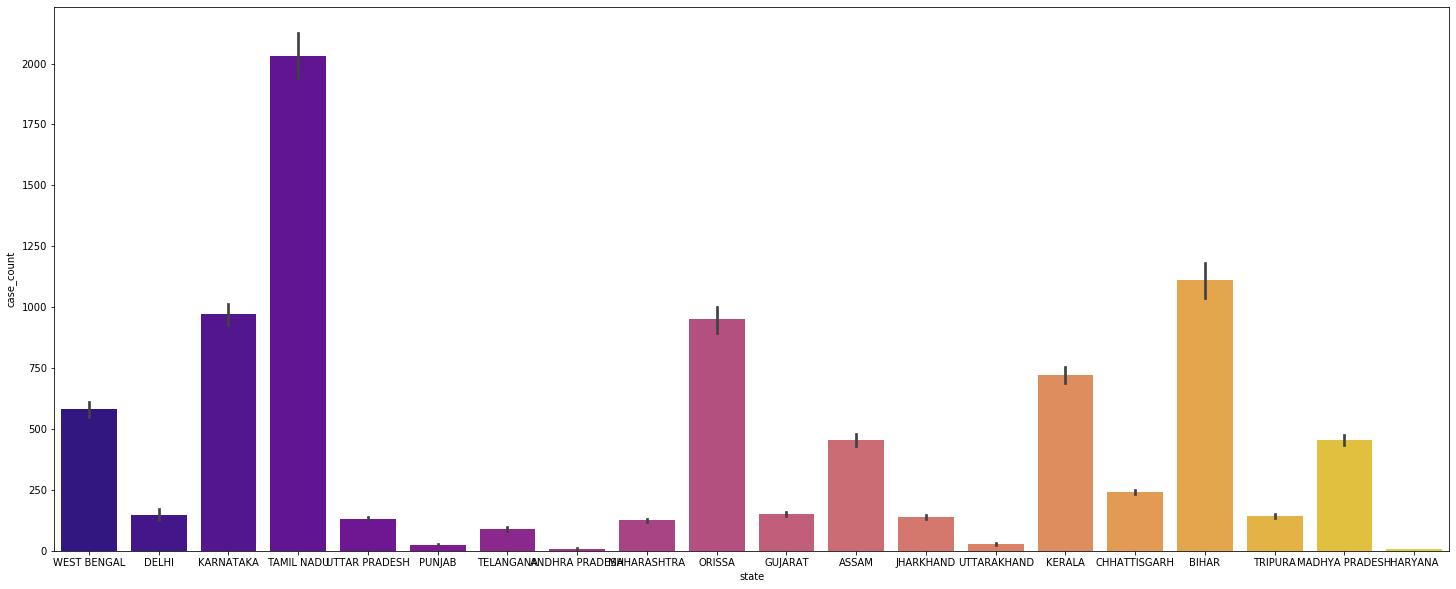

In [48]:
plt.figure(figsize=(25,10))
sns.barplot(x ='state', y ='case_count', data = train,palette ='plasma',estimator = np.std) 

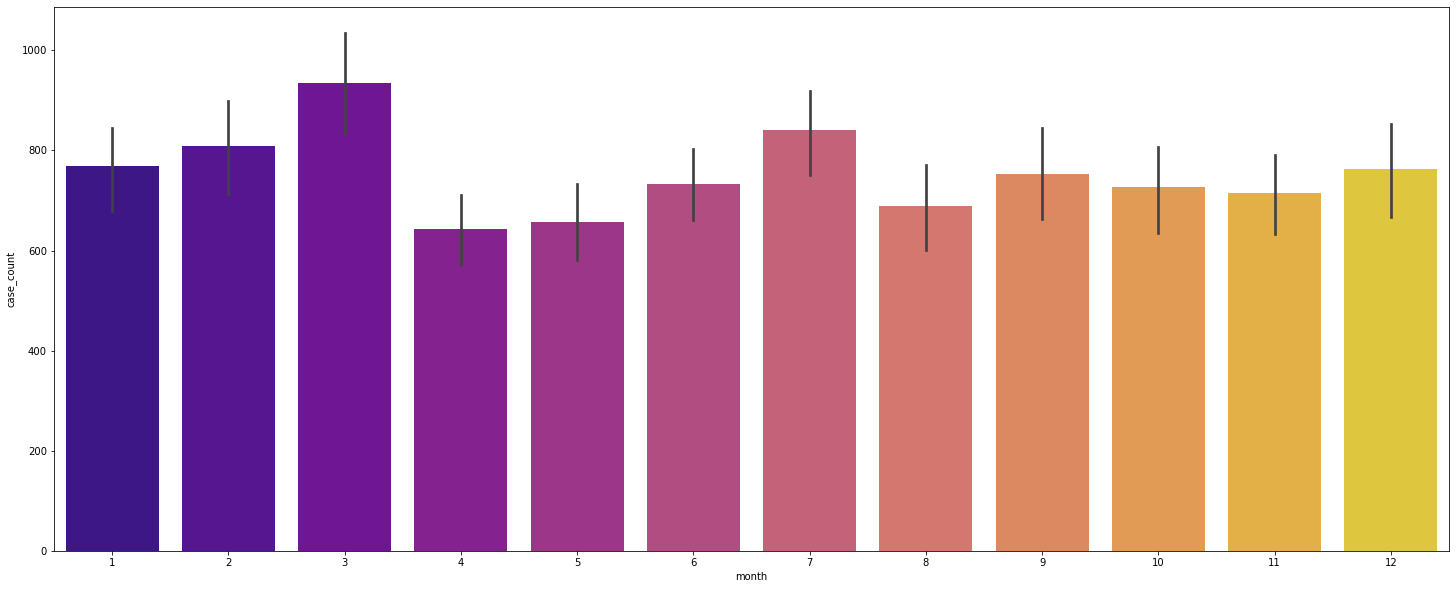

In [50]:
plt.figure(figsize=(25,10))
sns.barplot(x ='month', y ='case_count', data = train,palette ='plasma',estimator = np.std) 

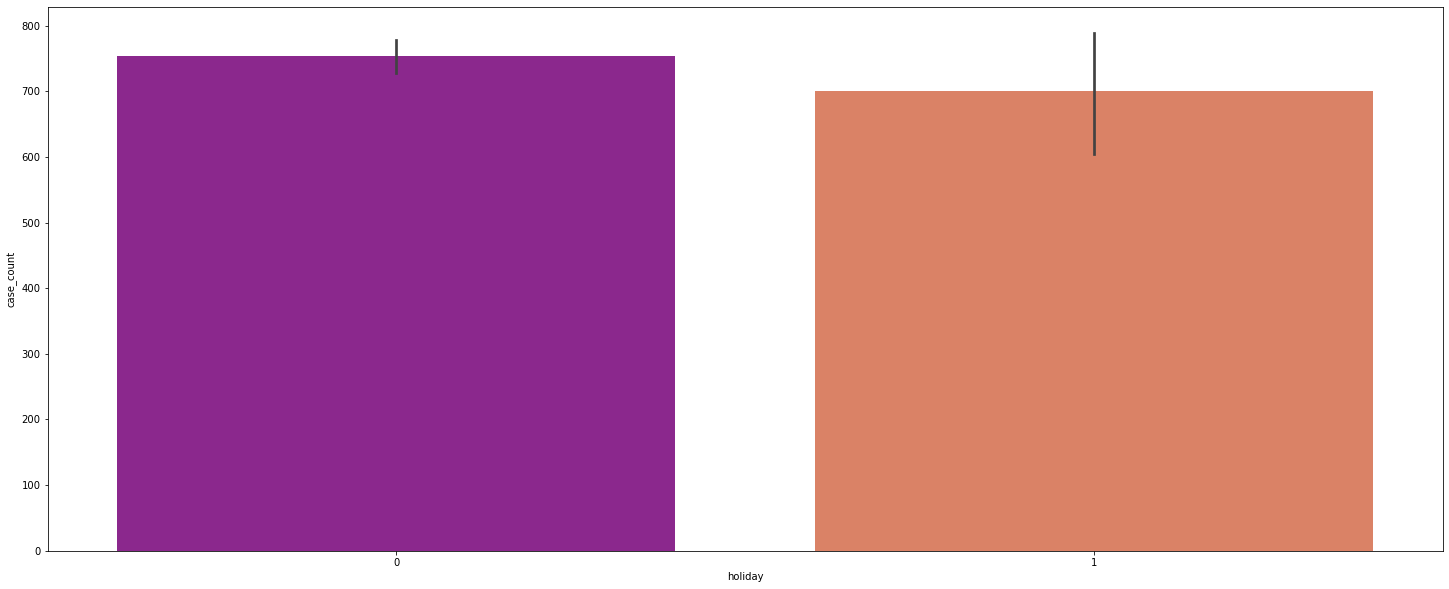

In [51]:
plt.figure(figsize=(25,10))
sns.barplot(x ='holiday', y ='case_count', data = train,palette ='plasma',estimator = np.std) 

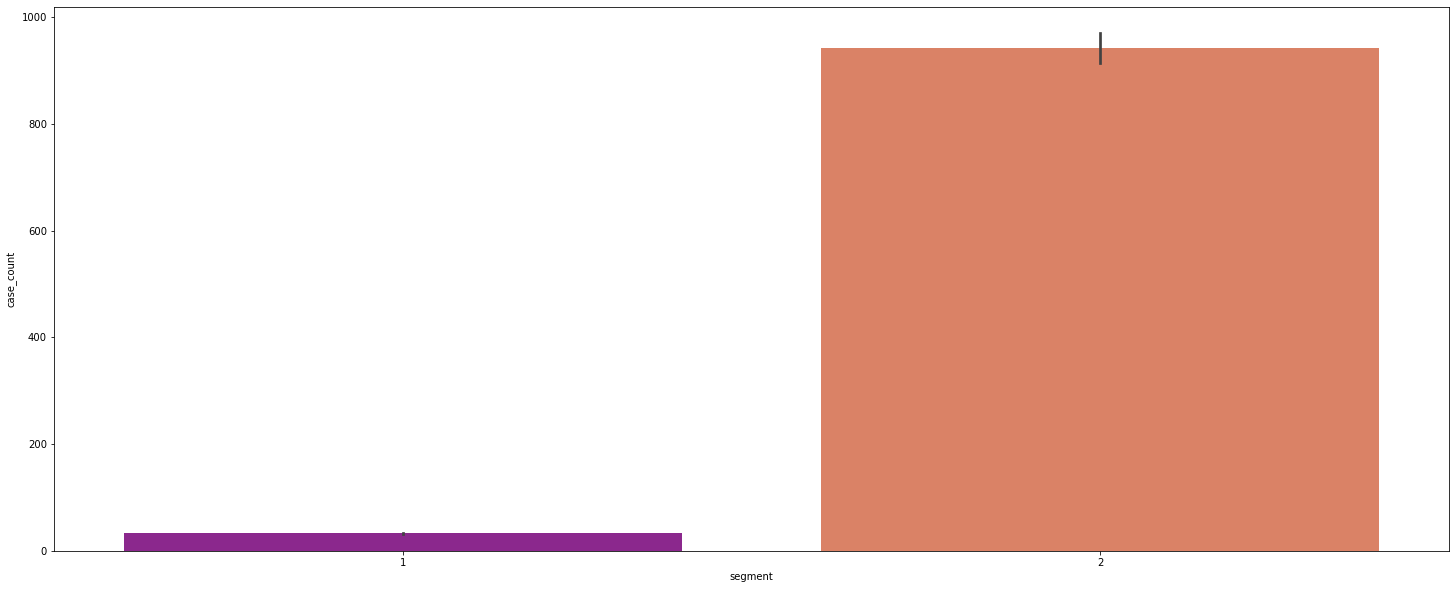

In [54]:
plt.figure(figsize=(25,10))

sns.barplot(x='segment',y='case_count', data=train, palette = 'plasma')

In [85]:
# df=pd.DataFrame(columns=['application_date','size'])
train.groupby('application_date').agg({'case_count':np.mean}).sort_values(by='case_count',ascending=False)
# train['application_date'].value_counts(normalize=True)*1000

,case_count
application_date,
2019-07-18,2034.187500
2019-07-17,1975.250000
2019-07-16,1954.812500
2019-07-19,1861.125000
2019-07-23,1823.937500
...,...
2018-04-01,17.595960
2017-05-28,17.343434
2017-07-30,14.939394


In [98]:
train.groupby('segment').agg({'case_count':np.mean})

,case_count
segment,
1,32.707106
2,942.318646


In [96]:
cc_per_month = dict(train.groupby('month').agg({'case_count':np.mean}))


In [95]:
cc_perday = dict(train.groupby('day').agg({'case_count':np.mean}))

In [65]:
df.shape

(844,)

<Figure size 1296x1296 with 0 Axes>

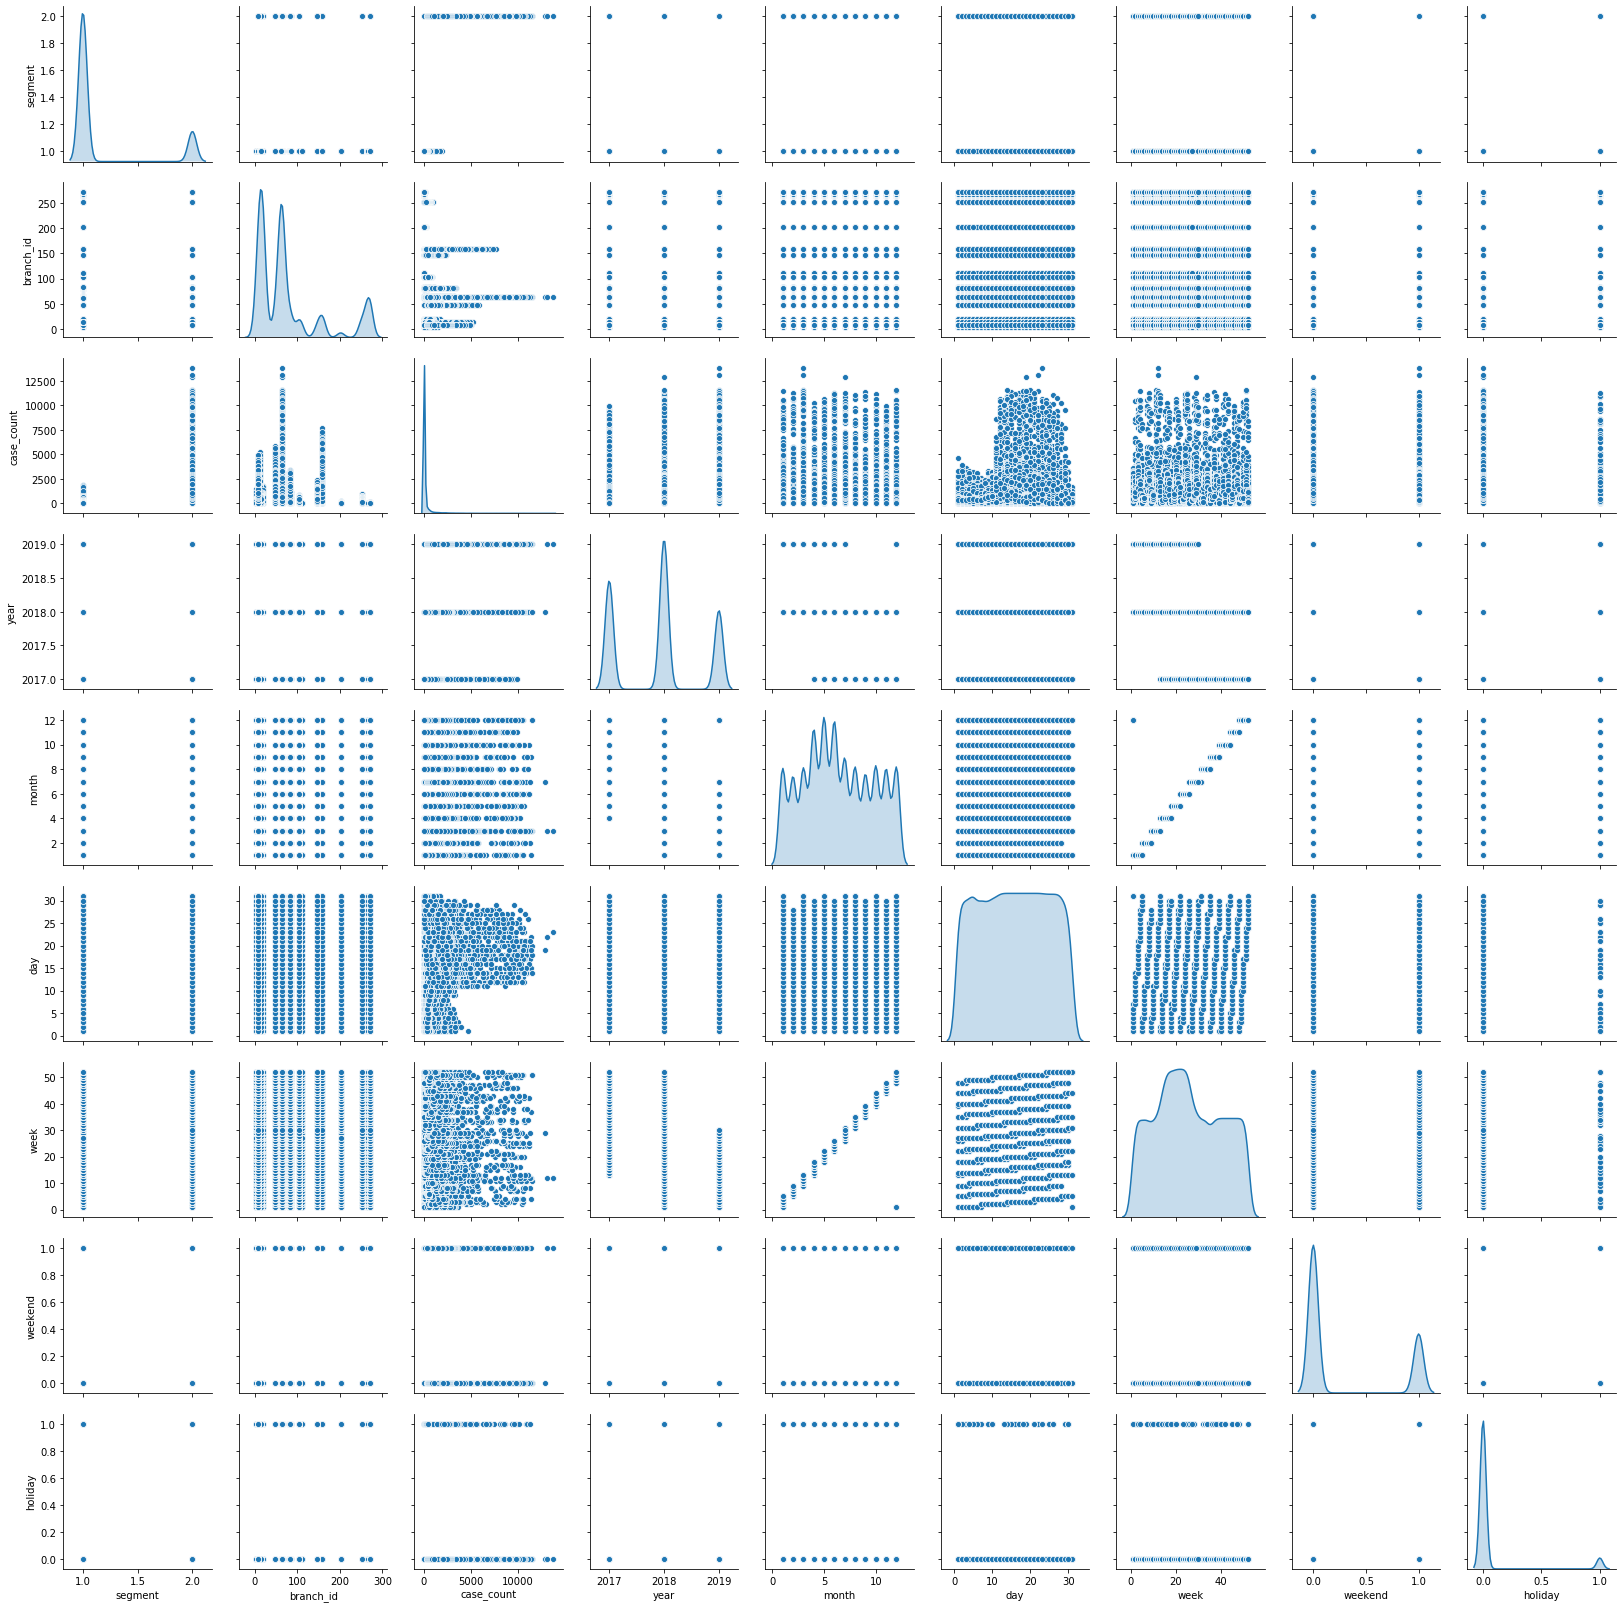

In [99]:
plt.figure(figsize=(18, 18))

sns.pairplot(train, diag_kind='kde');